✅ Setup complete!

📊 Loading S&P 500 stocks...
✅ Loaded 100 stocks

📥 Downloading price data...
Date range: 2020-11-26 to 2025-11-25
This takes 2-3 minutes...



[*********************100%***********************]  100 of 100 completed



Data downloaded. Shape: (1254, 500)
Column structure: <class 'pandas.core.indexes.multi.MultiIndex'>
Detected MultiIndex columns (your system format)
Sample columns: [('Close', 'AAPL'), ('Close', 'ABBV'), ('Close', 'ABT'), ('Close', 'ACN'), ('Close', 'ADBE')]
✅ Extracted prices for 100 stocks
Final shape: (1254, 100)

🧹 Cleaning data...
   Raw shape: (1254, 100)
   Kept 100 stocks with <15% missing
   Clean shape: (1254, 100)
✅ Successfully cleaned 100 stocks over 1254 days
💾 Saved: sp500_prices.csv

📊 Calculating returns and metrics...
   Returns shape: (1253, 100)
   Calculated metrics for 100 stocks

📈 Metrics Summary:
       Annual_Return  Annual_Volatility  Sharpe_Ratio  Max_Drawdown
count     100.000000         100.000000    100.000000    100.000000
mean        0.170425           0.286402      0.512583     -0.397419
std         0.122911           0.085542      0.343504      0.137560
min        -0.082522           0.159815     -0.298048     -0.767361
25%         0.089621         

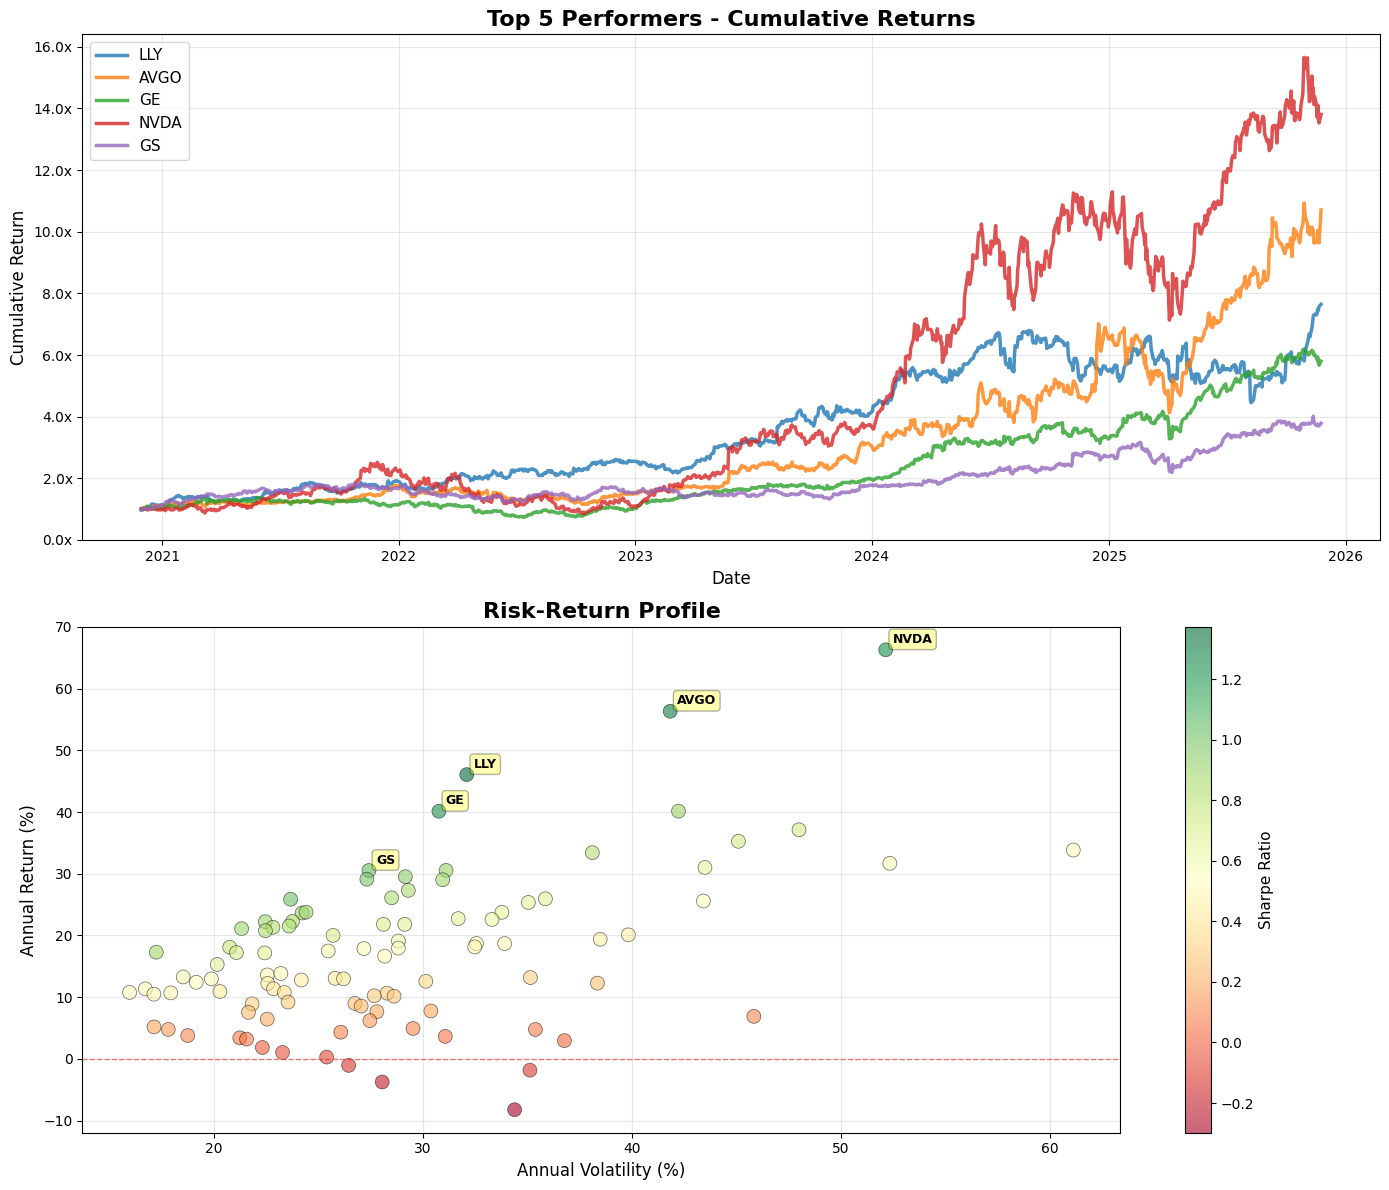

💾 Saved: portfolio_analysis.png

📊 PORTFOLIO ANALYSIS SUMMARY

📈 Dataset:
   • Stocks analyzed: 100
   • Trading days: 1254
   • Date range: 2020-11-27 to 2025-11-24

💰 Performance:
   • Average return: 17.04%
   • Best performer: NVDA (66.30%)

📊 Risk:
   • Average volatility: 28.64%
   • Best Sharpe: LLY (1.37)

📉 Drawdown:
   • Average max drawdown: -39.74%

✅ ANALYSIS COMPLETE!

📁 Files created:
   ✓ sp500_prices.csv
   ✓ sp500_returns.csv
   ✓ sp500_metrics.csv
   ✓ portfolio_analysis.png

🎯 Next steps:
   1. Review charts and metrics
   2. Ready for portfolio optimization!

🚀 Setup complete!


In [1]:
# ============================================
# S&P 500 PORTFOLIO - CUSTOM FIX FOR YOUR SYSTEM
# Based on your diagnostic results
# ============================================

!pip install yfinance pandas numpy matplotlib seaborn plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("✅ Setup complete!")

# ============================================
# STOCK LIST
# ============================================

print("\n📊 Loading S&P 500 stocks...")

tickers = [
    # Technology (25)
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'AVGO', 'ORCL',
    'ADBE', 'CRM', 'CSCO', 'ACN', 'AMD', 'INTC', 'QCOM', 'TXN', 'IBM', 
    'INTU', 'AMAT', 'MU', 'LRCX', 'ADI', 'KLAC', 'SNPS',
    
    # Financials (20)
    'BRK-B', 'JPM', 'V', 'MA', 'BAC', 'WFC', 'MS', 'GS', 'SPGI', 'BLK',
    'AXP', 'C', 'SCHW', 'CB', 'MMC', 'PGR', 'AON', 'CME', 'ICE', 'COF',
    
    # Healthcare (20)
    'UNH', 'JNJ', 'LLY', 'ABBV', 'MRK', 'TMO', 'ABT', 'DHR', 'PFE', 'BMY',
    'AMGN', 'GILD', 'CVS', 'CI', 'MDT', 'ISRG', 'REGN', 'VRTX', 'ZTS', 'ELV',
    
    # Consumer (15)
    'WMT', 'HD', 'MCD', 'NKE', 'COST', 'PG', 'KO', 'PEP', 'LOW', 'SBUX',
    'TJX', 'BKNG', 'MAR', 'PM', 'MDLZ',
    
    # Energy & Industrials (10)
    'XOM', 'CVX', 'COP', 'SLB', 'EOG', 'UPS', 'RTX', 'HON', 'CAT', 'BA',
    
    # Others (10)
    'UNP', 'GE', 'LMT', 'DE', 'MMM', 'DUK', 'SO', 'NEE', 'D', 'AEP'
]

print(f"✅ Loaded {len(tickers)} stocks")

# ============================================
# DOWNLOAD DATA - CUSTOM FIX FOR YOUR SYSTEM
# ============================================

print(f"\n📥 Downloading price data...")

end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

print(f"Date range: {start_date.date()} to {end_date.date()}")
print("This takes 2-3 minutes...\n")

# YOUR SYSTEM USES MULTIINDEX WITH 'Close' NOT 'Adj Close'
# So we need to extract it differently

try:
    print("Downloading data...")
    data = yf.download(
        tickers,
        start=start_date,
        end=end_date,
        progress=True
    )
    
    print(f"\nData downloaded. Shape: {data.shape}")
    print(f"Column structure: {type(data.columns)}")
    
    # YOUR SYSTEM: MultiIndex with (field, ticker) format
    # Example: ('Close', 'AAPL'), ('High', 'AAPL'), etc.
    
    if isinstance(data.columns, pd.MultiIndex):
        print("Detected MultiIndex columns (your system format)")
        print(f"Sample columns: {data.columns[:5].tolist()}")
        
        # Extract Close prices for each ticker
        prices = pd.DataFrame(index=data.index)
        
        for ticker in tickers:
            try:
                # Your system uses ('Close', ticker) format
                if ('Close', ticker) in data.columns:
                    prices[ticker] = data[('Close', ticker)]
                elif ('Adj Close', ticker) in data.columns:
                    prices[ticker] = data[('Adj Close', ticker)]
                elif ('Adj_Close', ticker) in data.columns:
                    prices[ticker] = data[('Adj_Close', ticker)]
            except:
                continue
        
        print(f"✅ Extracted prices for {len(prices.columns)} stocks")
        
    else:
        # Shouldn't happen based on your diagnostic, but just in case
        print("Single-level columns detected")
        if 'Close' in data.columns:
            prices = data['Close'].copy()
        elif 'Adj Close' in data.columns:
            prices = data['Adj Close'].copy()
        else:
            prices = data
    
    # Verify we got data
    if len(prices.columns) == 0:
        raise ValueError("No price data extracted!")
    
    print(f"Final shape: {prices.shape}")
    
except Exception as e:
    print(f"\n⚠️ Bulk download issue: {e}")
    print("Trying individual downloads...\n")
    
    # Fallback: one by one
    prices = pd.DataFrame()
    
    for i, ticker in enumerate(tickers):
        if (i + 1) % 10 == 0:
            print(f"   Progress: {i+1}/{len(tickers)}")
        
        try:
            stock_data = yf.download(ticker, start=start_date, end=end_date, progress=False)
            
            if not stock_data.empty:
                # Handle MultiIndex from single stock download
                if isinstance(stock_data.columns, pd.MultiIndex):
                    # Your format: ('Close', 'AAPL')
                    if ('Close', ticker) in stock_data.columns:
                        prices[ticker] = stock_data[('Close', ticker)]
                    elif ('Adj Close', ticker) in stock_data.columns:
                        prices[ticker] = stock_data[('Adj Close', ticker)]
                else:
                    # Regular format
                    if 'Close' in stock_data.columns:
                        prices[ticker] = stock_data['Close']
                    elif 'Adj Close' in stock_data.columns:
                        prices[ticker] = stock_data['Adj Close']
        except:
            continue
    
    print(f"\n✅ Downloaded {len(prices.columns)} stocks individually")

# ============================================
# CLEAN DATA
# ============================================

print("\n🧹 Cleaning data...")
print(f"   Raw shape: {prices.shape}")

# Remove stocks with too much missing data
missing_pct = prices.isnull().sum() / len(prices)
valid_stocks = missing_pct[missing_pct < 0.15].index.tolist()
prices = prices[valid_stocks]

print(f"   Kept {len(valid_stocks)} stocks with <15% missing")

# Fill missing values
prices = prices.fillna(method='ffill')
prices = prices.fillna(method='bfill')
prices = prices.dropna()

print(f"   Clean shape: {prices.shape}")

if prices.shape[0] < 100 or prices.shape[1] < 10:
    print("\n⚠️ WARNING: Insufficient data")
    raise ValueError("Not enough data downloaded")

print(f"✅ Successfully cleaned {prices.shape[1]} stocks over {prices.shape[0]} days")

# Save
prices.to_csv('sp500_prices.csv')
print("💾 Saved: sp500_prices.csv")

# ============================================
# CALCULATE RETURNS & METRICS
# ============================================

print("\n📊 Calculating returns and metrics...")

returns = prices.pct_change().dropna()
print(f"   Returns shape: {returns.shape}")

# Calculate metrics
metrics_list = []

for stock in returns.columns:
    try:
        stock_returns = returns[stock].dropna()
        
        if len(stock_returns) < 50:
            continue
        
        annual_return = stock_returns.mean() * 252
        annual_vol = stock_returns.std() * np.sqrt(252)
        sharpe = (annual_return - 0.02) / annual_vol if annual_vol > 0 else 0
        
        cumulative = (1 + stock_returns).cumprod()
        running_max = cumulative.cummax()
        drawdown = (cumulative - running_max) / running_max
        max_dd = drawdown.min()
        
        metrics_list.append({
            'Stock': stock,
            'Annual_Return': annual_return,
            'Annual_Volatility': annual_vol,
            'Sharpe_Ratio': sharpe,
            'Max_Drawdown': max_dd
        })
    except:
        continue

metrics = pd.DataFrame(metrics_list)
metrics = metrics.set_index('Stock')
metrics = metrics.sort_values('Sharpe_Ratio', ascending=False)

print(f"   Calculated metrics for {len(metrics)} stocks")

print("\n📈 Metrics Summary:")
print(metrics.describe())

print("\n🏆 Top 10 Stocks by Sharpe Ratio:")
print(metrics.head(10))

# Save
returns.to_csv('sp500_returns.csv')
metrics.to_csv('sp500_metrics.csv')

print("\n💾 Saved:")
print("   • sp500_returns.csv")
print("   • sp500_metrics.csv")

# ============================================
# CREATE VISUALIZATIONS
# ============================================

print("\n📊 Creating visualizations...")

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot 1: Top 5 Cumulative Returns
try:
    cumulative = (1 + returns).cumprod()
    top_5_stocks = metrics.head(5).index.tolist()
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    for i, stock in enumerate(top_5_stocks):
        if stock in cumulative.columns:
            axes[0].plot(
                cumulative.index, 
                cumulative[stock], 
                linewidth=2.5, 
                label=stock, 
                alpha=0.8,
                color=colors[i]
            )
    
    axes[0].set_title('Top 5 Performers - Cumulative Returns', 
                     fontsize=16, fontweight='bold')
    axes[0].set_ylabel('Cumulative Return', fontsize=12)
    axes[0].set_xlabel('Date', fontsize=12)
    axes[0].legend(loc='upper left', fontsize=11)
    axes[0].grid(True, alpha=0.3)
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1f}x'))
    
except Exception as e:
    print(f"   Plot 1 warning: {e}")
    axes[0].text(0.5, 0.5, 'Chart unavailable', ha='center', va='center')

# Plot 2: Risk-Return Scatter
try:
    scatter = axes[1].scatter(
        metrics['Annual_Volatility'] * 100,
        metrics['Annual_Return'] * 100,
        c=metrics['Sharpe_Ratio'],
        s=100,
        alpha=0.6,
        cmap='RdYlGn',
        edgecolors='black',
        linewidth=0.5
    )
    
    cbar = plt.colorbar(scatter, ax=axes[1])
    cbar.set_label('Sharpe Ratio', fontsize=11)
    
    for idx, row in metrics.head(5).iterrows():
        axes[1].annotate(
            idx,
            (row['Annual_Volatility'] * 100, row['Annual_Return'] * 100),
            fontsize=9,
            fontweight='bold',
            xytext=(5, 5),
            textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3)
        )
    
    axes[1].set_xlabel('Annual Volatility (%)', fontsize=12)
    axes[1].set_ylabel('Annual Return (%)', fontsize=12)
    axes[1].set_title('Risk-Return Profile', fontsize=16, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    axes[1].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
    
except Exception as e:
    print(f"   Plot 2 warning: {e}")
    axes[1].text(0.5, 0.5, 'Chart unavailable', ha='center', va='center')

plt.tight_layout()
plt.savefig('portfolio_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Saved: portfolio_analysis.png")

# ============================================
# SUMMARY
# ============================================

print("\n" + "="*70)
print("📊 PORTFOLIO ANALYSIS SUMMARY")
print("="*70)

print(f"\n📈 Dataset:")
print(f"   • Stocks analyzed: {len(prices.columns)}")
print(f"   • Trading days: {len(prices)}")
print(f"   • Date range: {prices.index.min().date()} to {prices.index.max().date()}")

print(f"\n💰 Performance:")
print(f"   • Average return: {metrics['Annual_Return'].mean():.2%}")
print(f"   • Best performer: {metrics['Annual_Return'].idxmax()} ({metrics['Annual_Return'].max():.2%})")

print(f"\n📊 Risk:")
print(f"   • Average volatility: {metrics['Annual_Volatility'].mean():.2%}")
print(f"   • Best Sharpe: {metrics['Sharpe_Ratio'].idxmax()} ({metrics['Sharpe_Ratio'].max():.2f})")

print(f"\n📉 Drawdown:")
print(f"   • Average max drawdown: {metrics['Max_Drawdown'].mean():.2%}")

print("\n" + "="*70)
print("✅ ANALYSIS COMPLETE!")
print("="*70)

print("\n📁 Files created:")
print("   ✓ sp500_prices.csv")
print("   ✓ sp500_returns.csv")
print("   ✓ sp500_metrics.csv")
print("   ✓ portfolio_analysis.png")

print("\n🎯 Next steps:")
print("   1. Review charts and metrics")
print("   2. Ready for portfolio optimization!")

print("\n🚀 Setup complete!")
print("="*70)